<a href="https://colab.research.google.com/github/brandonthimmesch/IMSE541/blob/main/MSDA_Control_Charts.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Import required libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import statistics

In [ ]:
# mount google drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


#  C Control Chart for Alpha Product Defects

In [ ]:
# retrive data for alpha defects
a_defects = pd.read_csv('drive/My Drive/Colab Notebooks/MSDA/alpha_defects.csv', sep=',', na_values=".")
a_defects

,defects,group_size,p
0,4,20,0.20
1,7,20,0.35
2,5,20,0.25
3,4,20,0.20
4,8,20,0.40


All points within control limits.


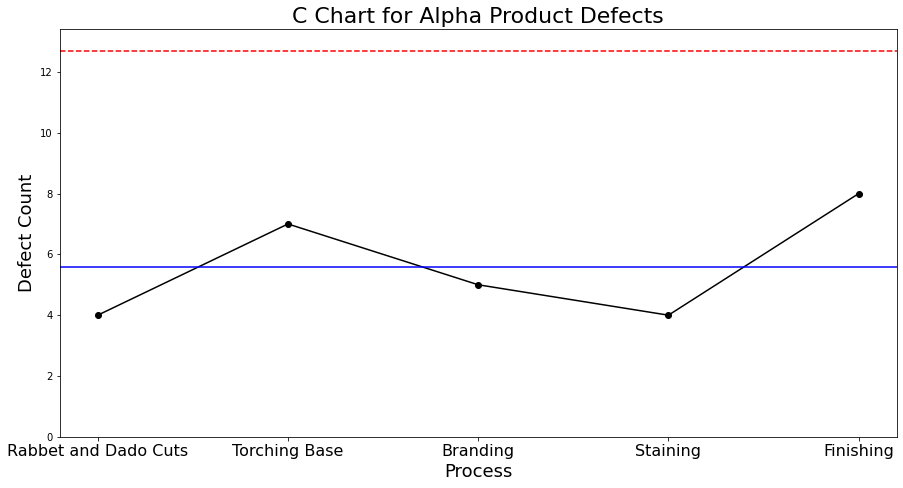

In [ ]:
# Plot c-chart
plt.figure(figsize=(15,7.5))
plt.plot(a_defects['defects'], linestyle='-', marker='o', color='black')
plt.axhline(statistics.mean(a_defects['defects'])+3*np.sqrt(statistics.mean(a_defects['defects'])), color='red', linestyle='dashed')
plt.axhline(statistics.mean(a_defects['defects'])-3*np.sqrt(statistics.mean(a_defects['defects'])), color='red', linestyle='dashed')
plt.axhline(statistics.mean(a_defects['defects']), color='blue')
plt.ylim(bottom=0)
plt.title('C Chart for Alpha Product Defects', fontsize = 22)
plt.xlabel('Process', fontsize = 18)
plt.ylabel('Defect Count', fontsize = 18)

bars = ('Rabbet and Dado Cuts','Torching Base','Branding','Staining','Finishing')
y_pos = np.arange(len(bars))
plt.xticks(y_pos, bars, fontsize = 16)

# Validate points out of control limits
i = 0
control = True
for group in a_defects['defects']:
    if group > statistics.mean(a_defects['defects'])+3*np.sqrt(statistics.mean(a_defects['defects'])) or group < statistics.mean(a_defects['defects'])-3*np.sqrt(statistics.mean(a_defects['defects'])):
        print('Group', i, 'out of defects cotrol limits!')
        control = False
    i += 1
if control == True:
    print('All points within control limits.')

# C Control Chart for Beta Product Defects

In [ ]:
# retrive data for beta defects
b_defects = pd.read_csv('drive/My Drive/Colab Notebooks/MSDA/beta_defects.csv', sep=',', na_values=".")
b_defects

,defects,group_size,p
0,6,20,0.30
1,3,20,0.15
2,10,20,0.50
3,2,20,0.10
4,8,20,0.40


All points within control limits.


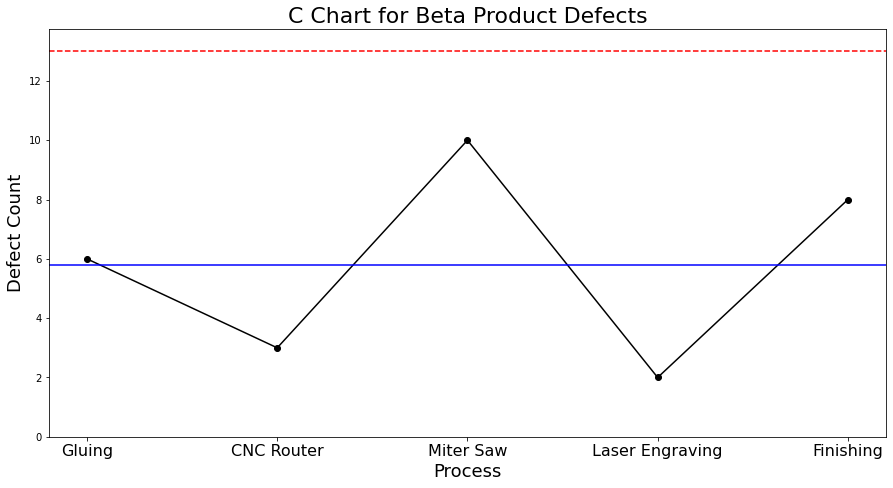

In [ ]:
# Plot c-chart
plt.figure(figsize=(15,7.5))
plt.plot(b_defects['defects'], linestyle='-', marker='o', color='black')
plt.axhline(statistics.mean(b_defects['defects'])+3*np.sqrt(statistics.mean(b_defects['defects'])), color='red', linestyle='dashed')
plt.axhline(statistics.mean(b_defects['defects'])-3*np.sqrt(statistics.mean(b_defects['defects'])), color='red', linestyle='dashed')
plt.axhline(statistics.mean(b_defects['defects']), color='blue')
plt.ylim(bottom=0)
plt.title('C Chart for Beta Product Defects', fontsize = 22)
plt.xlabel('Process', fontsize = 18)
plt.ylabel('Defect Count', fontsize = 18)

bars = ('Gluing','CNC Router','Miter Saw','Laser Engraving','Finishing')
y_pos = np.arange(len(bars))
plt.xticks(y_pos, bars, fontsize = 16)

# Validate points out of control limits
i = 0
control = True
for group in a_defects['defects']:
    if group > statistics.mean(b_defects['defects'])+3*np.sqrt(statistics.mean(b_defects['defects'])) or group < statistics.mean(b_defects['defects'])-3*np.sqrt(statistics.mean(b_defects['defects'])):
        print('Group', i, 'out of defects cotrol limits!')
        control = False
    i += 1
if control == True:
    print('All points within control limits.')

# X bar and R Control Charts for Beta Product Thickness

In [ ]:
# retrive data for beta thick
b_thick = pd.read_csv('drive/My Drive/Colab Notebooks/MSDA/beta_thickness.csv', sep=',', na_values=".")
b_thick['Sample'] = b_thick.index+1
b_thick.tail()

,shift_1,shift_2,shift_3,shift_4,shift_5,Sample
5,0.369,0.389,0.358,0.301,0.378,6
6,0.387,0.391,0.316,0.389,0.390,7
7,0.374,0.353,0.356,0.339,0.356,8
8,0.302,0.371,0.393,0.361,0.377,9
9,0.378,0.349,0.299,0.369,0.302,10


In [ ]:
#generate the Phase I data using filter
#use the first 30 observations to setup the control charts
b_thick_dataI= [b_thick[['shift_1', 'shift_2', 'shift_3', 'shift_4','shift_5']][b_thick['Sample'] < 31]]

#retrieve the Phase II data
b_thick_dataII= [b_thick[['shift_1', 'shift_2', 'shift_3', 'shift_4','shift_5']][b_thick['Sample'] >= 31]]
         
#all data points; the data type is a list
b_thick_dataAll = [b_thick[['shift_1', 'shift_2', 'shift_3', 'shift_4','shift_5']]]

b_thick_dataAll

[   shift_1  shift_2  shift_3  shift_4  shift_5
 0    0.374    0.303    0.373    0.315    0.367
 1    0.369    0.371    0.362    0.371    0.303
 2    0.371    0.381    0.305    0.298    0.354
 3    0.384    0.351    0.352    0.317    0.378
 4    0.369    0.334    0.363    0.315    0.300
 5    0.369    0.389    0.358    0.301    0.378
 6    0.387    0.391    0.316    0.389    0.390
 7    0.374    0.353    0.356    0.339    0.356
 8    0.302    0.371    0.393    0.361    0.377
 9    0.378    0.349    0.299    0.369    0.302]

In [ ]:
# this np.reshape convert the list dataI into the proper subgroup and m=10
x=np.reshape(b_thick_dataI, (10,5))
x

array([[0.374, 0.303, 0.373, 0.315, 0.367],
       [0.369, 0.371, 0.362, 0.371, 0.303],
       [0.371, 0.381, 0.305, 0.298, 0.354],
       [0.384, 0.351, 0.352, 0.317, 0.378],
       [0.369, 0.334, 0.363, 0.315, 0.3  ],
       [0.369, 0.389, 0.358, 0.301, 0.378],
       [0.387, 0.391, 0.316, 0.389, 0.39 ],
       [0.374, 0.353, 0.356, 0.339, 0.356],
       [0.302, 0.371, 0.393, 0.361, 0.377],
       [0.378, 0.349, 0.299, 0.369, 0.302]])

In [ ]:
# Define list variable for groups means
b_thick_x_bar = []

# Define list variable for groups ranges
b_thick_r = []

# Define list variable for groups standard deviation
b_thick_s = []

In [ ]:
# Get and append groups means and ranges
# if you run this cell multiple times, then the data series will be repeated
for group in x:
    b_thick_x_bar.append(group.mean())
    b_thick_r.append(group.max() - group.min())
    b_thick_s.append(np.std(group))
#print(x_bar)
#print(r)
m=len(b_thick_x_bar)
print('points in x, ', m)

points in x,  10


([<matplotlib.axis.XTick at 0x7fcf3ac021f0>,
 [Text(0, 0, '1'),
  Text(0, 0, '2'),
  Text(0, 0, '3'),
  Text(0, 0, '4'),
  Text(0, 0, '5'),
  Text(0, 0, '6'),
  Text(0, 0, '7'),
  Text(0, 0, '8'),
  Text(0, 0, '9'),
  Text(0, 0, '10')])

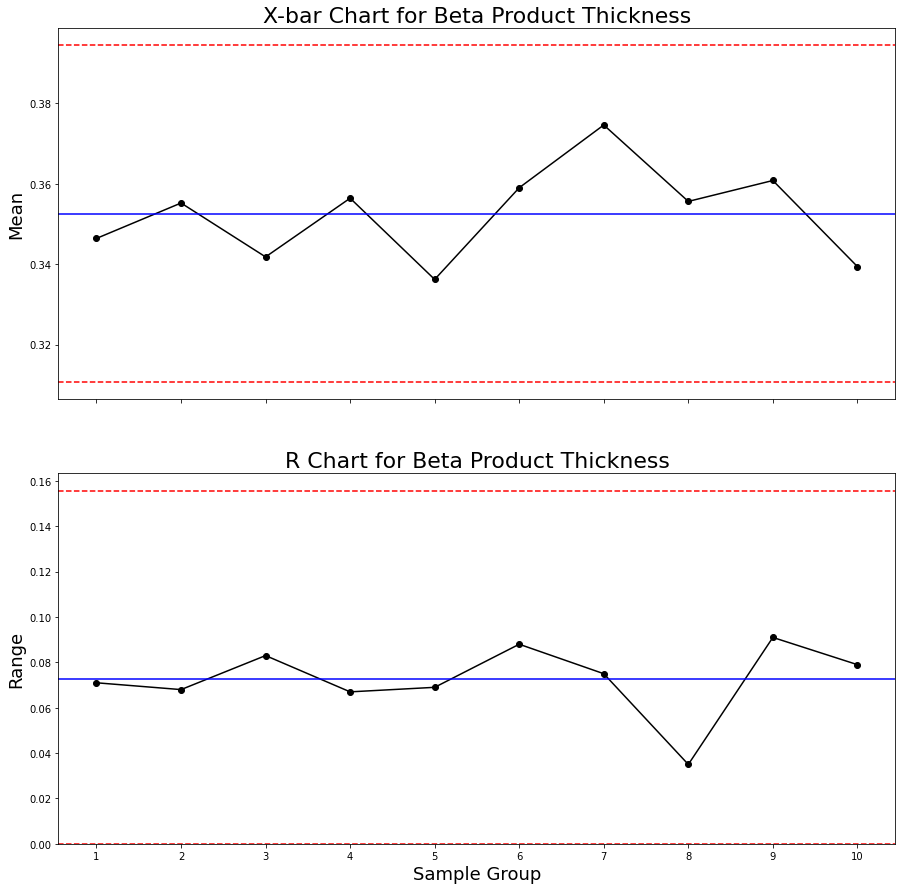

In [ ]:
# Plot x-bar and R charts
fig, axs = plt.subplots(2, figsize=(15,15), sharex='all')

# x-bar chart
# Chart parameters A2=0.577, D3, and D4 
A2=0.577 #n=5
D3=0     #n=5
D4=2.144 #n=5

axs[0].plot(b_thick_x_bar, linestyle='-', marker='o', color='black')
axs[0].axhline((statistics.mean(b_thick_x_bar)+A2*statistics.mean(b_thick_r)), color='red', linestyle='dashed')
axs[0].axhline((statistics.mean(b_thick_x_bar)-A2*statistics.mean(b_thick_r)), color='red', linestyle='dashed')
axs[0].axhline((statistics.mean(b_thick_x_bar)), color='blue')
axs[0].set_title('X-bar Chart for Beta Product Thickness',fontsize=22)
axs[0].set( ylabel='Mean')
axs[0].yaxis.get_label().set_fontsize(18)


bars = ('1','2','3','4','5','6','7','8','9','10')
y_pos = np.arange(len(bars))
plt.xticks(y_pos, bars)

# R chart
axs[1].plot(b_thick_r, linestyle='-', marker='o', color='black')
axs[1].axhline((D4*statistics.mean(b_thick_r)), color='red', linestyle='dashed')
axs[1].axhline((D3*statistics.mean(b_thick_r)), color='red', linestyle='dashed')
axs[1].axhline((statistics.mean(b_thick_r)), color='blue')
axs[1].set_ylim(bottom=0)
axs[1].set_title('R Chart for Beta Product Thickness',fontsize=22)
axs[1].set(xlabel='Sample Group', ylabel='Range')
axs[1].xaxis.get_label().set_fontsize(18)
axs[1].yaxis.get_label().set_fontsize(18)

bars = ('1','2','3','4','5','6','7','8','9','10')
y_pos = np.arange(len(bars))
plt.xticks(y_pos, bars)



# X bar and R Control Charts for Beta Product Width

In [ ]:
# retrive data for beta width
b_width = pd.read_csv('drive/My Drive/Colab Notebooks/MSDA/beta_width.csv', sep=',', na_values=".")
b_width.tail()

,shift_1,shift_2,shift_3,shift_4,shift_5
5,5.118,5.037,5.114,4.883,4.989
6,5.089,5.114,5.033,4.712,5.255
7,5.255,5.055,5.036,5.050,4.873
8,5.030,4.941,4.985,5.036,4.982
9,5.104,5.033,4.479,4.989,5.037


In [ ]:
#generate the Phase I data using filter
#use the first 30 observations to setup the control charts
b_width_dataI= [b_width[['shift_1', 'shift_2', 'shift_3', 'shift_4','shift_5']][b_thick['Sample'] < 31]]

#retrieve the Phase II data
b_width_dataII= [b_width[['shift_1', 'shift_2', 'shift_3', 'shift_4','shift_5']][b_thick['Sample'] >= 31]]
         
#all data points; the data type is a list
b_width_dataAll = [b_width[['shift_1', 'shift_2', 'shift_3', 'shift_4','shift_5']]]

b_width_dataAll

[   shift_1  shift_2  shift_3  shift_4  shift_5
 0    5.044    5.032    5.072    5.034    5.031
 1    5.046    5.039    5.048    5.028    5.043
 2    5.048    5.036    5.037    5.032    5.038
 3    4.960    5.038    5.039    4.981    5.039
 4    5.115    5.034    5.009    5.103    5.034
 5    5.118    5.037    5.114    4.883    4.989
 6    5.089    5.114    5.033    4.712    5.255
 7    5.255    5.055    5.036    5.050    4.873
 8    5.030    4.941    4.985    5.036    4.982
 9    5.104    5.033    4.479    4.989    5.037]

In [ ]:
# this np.reshape convert the list dataI into the proper subgroup and m=10
x=np.reshape(b_width_dataI, (10,5))
x

array([[5.044, 5.032, 5.072, 5.034, 5.031],
       [5.046, 5.039, 5.048, 5.028, 5.043],
       [5.048, 5.036, 5.037, 5.032, 5.038],
       [4.96 , 5.038, 5.039, 4.981, 5.039],
       [5.115, 5.034, 5.009, 5.103, 5.034],
       [5.118, 5.037, 5.114, 4.883, 4.989],
       [5.089, 5.114, 5.033, 4.712, 5.255],
       [5.255, 5.055, 5.036, 5.05 , 4.873],
       [5.03 , 4.941, 4.985, 5.036, 4.982],
       [5.104, 5.033, 4.479, 4.989, 5.037]])

In [ ]:
# Define list variable for groups means
b_width_x_bar = []

# Define list variable for groups ranges
b_width_r = []

# Define list variable for groups standard deviation
b_width_s = []

In [ ]:
# Get and append groups means and ranges
# if you run this cell multiple times, then the data series will be repeated
for group in x:
    b_width_x_bar.append(group.mean())
    b_width_r.append(group.max() - group.min())
    b_width_s.append(np.std(group))
#print(x_bar)
#print(r)
m=len(b_width_x_bar)
print('points in x, ', m)

points in x,  10


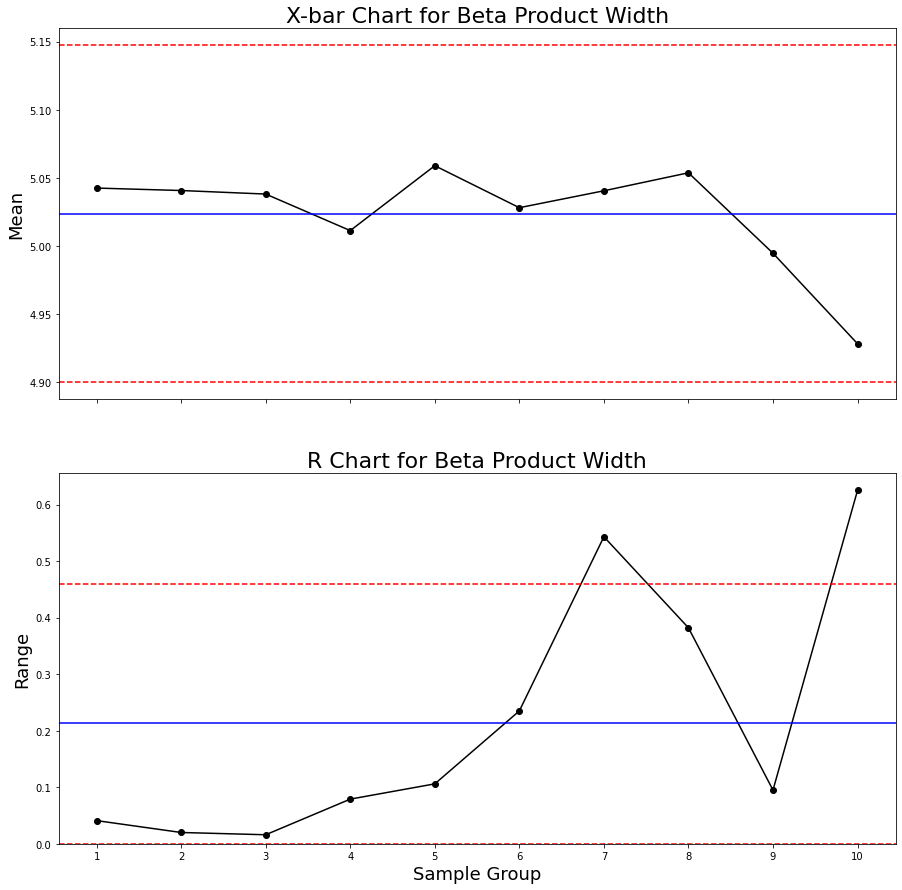

In [ ]:
# Plot x-bar and R charts
fig, axs = plt.subplots(2, figsize=(15,15), sharex = 'all')

# x-bar chart
# Chart parameters A2=0.577, D3, and D4 
A2=0.577 #n=5
D3=0     #n=5
D4=2.144 #n=5

axs[0].plot(b_width_x_bar, linestyle='-', marker='o', color='black')
axs[0].axhline((statistics.mean(b_width_x_bar)+A2*statistics.mean(b_width_r)), color='red', linestyle='dashed')
axs[0].axhline((statistics.mean(b_width_x_bar)-A2*statistics.mean(b_width_r)), color='red', linestyle='dashed')
axs[0].axhline((statistics.mean(b_width_x_bar)), color='blue')
axs[0].set_title('X-bar Chart for Beta Product Width',fontsize = 22)
axs[0].set(ylabel='Mean')
axs[0].yaxis.get_label().set_fontsize(18)

bars = ('1','2','3','4','5','6','7','8','9','10')
y_pos = np.arange(len(bars))
plt.xticks(y_pos, bars)

# R chart
axs[1].plot(b_width_r, linestyle='-', marker='o', color='black')
axs[1].axhline((D4*statistics.mean(b_width_r)), color='red', linestyle='dashed')
axs[1].axhline((D3*statistics.mean(b_width_r)), color='red', linestyle='dashed')
axs[1].axhline((statistics.mean(b_width_r)), color='blue')
axs[1].set_ylim(bottom=0)
axs[1].set_title('R Chart for Beta Product Width',fontsize = 22)
axs[1].set(xlabel='Sample Group', ylabel='Range')
axs[1].xaxis.get_label().set_fontsize(18)
axs[1].yaxis.get_label().set_fontsize(18)

In [ ]:
# Validate points out of control limits for x-bar chart
i = 0
control = True
for group in b_width_x_bar:
    if group > statistics.mean(b_width_x_bar)+A2*statistics.mean(b_width_r) or group < statistics.mean(b_width_x_bar)-A2*statistics.mean(b_width_r):
        print('Group', i, 'out of mean control limits!')
        control = False
    i += 1
if control == True:
    print('All points within control limits.')

All points within control limits.


In [ ]:
# Validate points out of control limits for R chart
i = 0
control = True
for group in b_width_r:
    if group > D4*statistics.mean(b_width_r):
        print('Group', i, 'out of range cotrol limits!')
        control = False
    i += 1
if control == True:
    print('All points within control limits.')

Group 6 out of range cotrol limits!
Group 9 out of range cotrol limits!
